COMP 5012 - Big Data Final Project

Name: Chandreen Ravihari Liyanage

Student Id: 1158931

# Setting Environment

Importing Libraries

In [83]:
from google.colab import drive
import os

import pandas as pd
import json
import csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report

Importing Data

In [51]:
# Mounting google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
# Setting the base path
base_path =  "/content/gdrive/MyDrive/Colab Notebooks/BigData_Project"
os.chdir(base_path)

# Exploratory Data Analysis

In [53]:
# Loading the dataset
data = pd.read_csv("dataset.csv")
data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,icu_id,...,apache_4a_icu_death_prob,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,Floor,92,...,0.05,0,0,0,0,0,0,0,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,Floor,90,...,0.29,0,0,0,0,0,0,0,Respiratory,0
2,33181,74489,83,67.0,27.560000,0,Caucasian,M,Accident & Emergency,95,...,0.02,0,0,0,0,0,0,0,Neurologic,0
3,82208,49526,83,59.0,57.450000,0,Caucasian,F,Accident & Emergency,95,...,0.05,0,0,0,0,0,0,0,Respiratory,0
4,120677,124688,118,78.0,NaN,0,Caucasian,F,Accident & Emergency,97,...,0.01,0,0,0,0,0,0,0,Cardiovascular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,118430,83320,6,21.0,24.874059,0,Caucasian,M,Accident & Emergency,915,...,0.00,0,0,0,0,0,0,0,Metabolic,0
20488,65539,128056,30,53.0,45.935203,0,Caucasian,M,Accident & Emergency,921,...,0.01,0,0,0,0,0,0,0,Cardiovascular,0
20489,111411,7848,195,67.0,28.876843,0,African American,M,Accident & Emergency,908,...,0.00,0,0,0,0,0,0,0,Metabolic,0
20490,91592,78108,30,75.0,23.060250,0,Caucasian,M,Floor,927,...,0.05,0,0,0,0,0,0,1,Cardiovascular,0


In [54]:
data.shape

(20492, 37)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20492 entries, 0 to 20491
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   20492 non-null  int64  
 1   patient_id                     20492 non-null  int64  
 2   hospital_id                    20492 non-null  int64  
 3   age                            19999 non-null  float64
 4   bmi                            19739 non-null  float64
 5   elective_surgery               20492 non-null  int64  
 6   ethnicity                      20299 non-null  object 
 7   gender                         20491 non-null  object 
 8   icu_admit_source               20468 non-null  object 
 9   icu_id                         20492 non-null  int64  
 10  icu_stay_type                  20492 non-null  object 
 11  icu_type                       20492 non-null  object 
 12  pre_icu_los_days               20492 non-null 

In [56]:
# Describe the dataset using statistical values
data.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,icu_id,pre_icu_los_days,apache_2_diagnosis,arf_apache,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,20492.000000,20492.000000,20492.000000,19999.000000,19739.000000,20492.000000,20492.000000,20492.000000,20328.000000,20492.000000,...,18788.000000,18788.000000,20492.000000,20492.000000,20492.000000,20492.000000,20492.000000,20492.000000,20492.000000,20492.000000
mean,65849.881466,65575.490777,107.025229,64.710286,31.833360,0.186365,515.123902,0.941478,186.317001,0.060999,...,0.093285,0.048856,0.000293,0.019178,0.015225,0.025425,0.007515,0.003855,0.017177,0.077835
std,37772.594895,37846.671601,63.375655,14.373407,8.994962,0.389411,229.221830,2.802880,87.325260,0.239335,...,0.236173,0.203942,0.017109,0.137154,0.122452,0.157415,0.086366,0.061972,0.129935,0.267919
min,1.000000,18.000000,2.000000,16.000000,14.844926,0.000000,82.000000,-0.211806,101.000000,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33248.250000,33137.250000,47.000000,57.000000,25.708163,0.000000,376.000000,0.041667,113.000000,0.000000,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66107.000000,65370.500000,116.000000,67.000000,30.245049,0.000000,513.000000,0.152083,123.000000,0.000000,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98640.000000,98219.250000,166.000000,75.000000,36.124123,0.000000,684.000000,0.468750,302.000000,0.000000,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131046.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,927.000000,159.090972,308.000000,1.000000,...,0.990000,0.960000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# List the columns according to their NULL value counts
data.isnull().sum(axis=0).sort_values(ascending=False)

apache_4a_hospital_death_prob    1704
apache_4a_icu_death_prob         1704
d1_potassium_min                 1577
d1_potassium_max                 1577
bmi                               753
d1_temp_min                       572
d1_temp_max                       572
age                               493
d1_glucose_min                    390
d1_glucose_max                    390
ethnicity                         193
apache_2_diagnosis                164
apache_2_bodysystem               164
d1_resprate_min                    85
d1_resprate_max                    85
icu_admit_source                   24
d1_heartrate_max                   21
d1_heartrate_min                   21
gender                              1
hepatic_failure                     0
immunosuppression                   0
cirrhosis                           0
aids                                0
leukemia                            0
lymphoma                            0
solid_tumor_with_metastasis         0
encounter_id

In [58]:
# Selecting columns with more than 1000 NULL values
null_cols = data.isnull().sum(axis=0).sort_values(ascending=False)[data.isnull().sum(axis=0).sort_values(ascending=False) > 1000]

# Drop Unnecessary ID columns and above selected columns with many NULL values
data.drop(null_cols.index.tolist() + ['encounter_id', 'icu_id', 'patient_id', 'hospital_id'], axis=1, inplace = True)

In [59]:
data

,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,apache_2_diagnosis,...,d1_glucose_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,Floor,admit,CTICU,0.541667,113.0,...,109.0,0,0,0,0,0,0,0,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,Floor,admit,Med-Surg ICU,0.927778,108.0,...,128.0,0,0,0,0,0,0,0,Respiratory,0
2,67.0,27.560000,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0.000694,301.0,...,125.0,0,0,0,0,0,0,0,Neurologic,0
3,59.0,57.450000,0,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,0.000694,108.0,...,129.0,0,0,0,0,0,0,0,Respiratory,0
4,78.0,NaN,0,Caucasian,F,Accident & Emergency,admit,MICU,0.000694,113.0,...,90.0,0,0,0,0,0,0,0,Cardiovascular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,21.0,24.874059,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0.052083,123.0,...,78.0,0,0,0,0,0,0,0,Metabolic,0
20488,53.0,45.935203,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0.097917,113.0,...,151.0,0,0,0,0,0,0,0,Cardiovascular,0
20489,67.0,28.876843,0,African American,M,Accident & Emergency,admit,Med-Surg ICU,0.213194,123.0,...,118.0,0,0,0,0,0,0,0,Metabolic,0
20490,75.0,23.060250,0,Caucasian,M,Floor,admit,Cardiac ICU,0.298611,113.0,...,187.0,0,0,0,0,0,0,1,Cardiovascular,0


In [60]:
# List number of unique values in each column
data.nunique()

age                               74
bmi                            13344
elective_surgery                   2
ethnicity                          6
gender                             2
icu_admit_source                   5
icu_stay_type                      3
icu_type                           8
pre_icu_los_days                4379
apache_2_diagnosis                44
arf_apache                         2
intubated_apache                   2
d1_heartrate_max                 120
d1_heartrate_min                 136
d1_resprate_max                   79
d1_resprate_min                   42
d1_temp_max                      126
d1_temp_min                      143
d1_glucose_max                   531
d1_glucose_min                   256
aids                               2
cirrhosis                          2
hepatic_failure                    2
immunosuppression                  2
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
a

Correlation between variabes through a heatmap

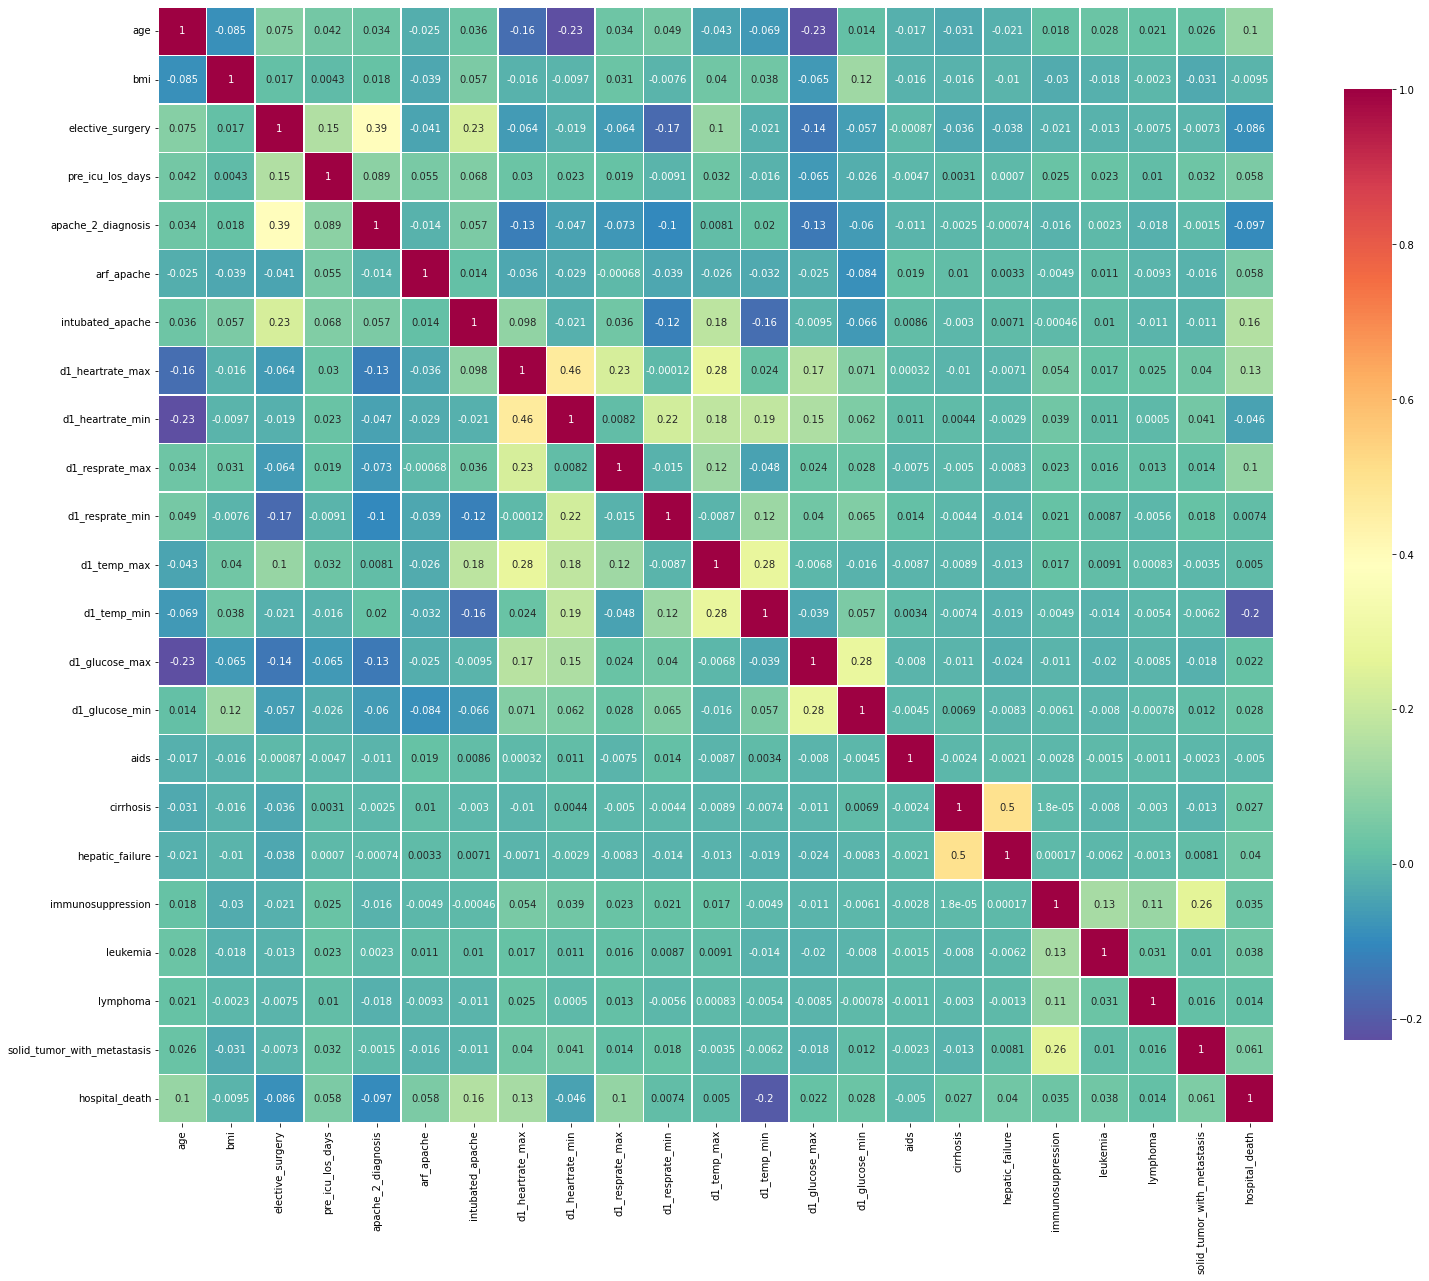

In [61]:
corr = data.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corr, cmap='Spectral_r',  square=True, annot=True, linewidth=0.5, cbar_kws={"shrink" : 0.7})

Average hospital death probability of patients

In [62]:
age_death_F=data[data['gender']=='F'][['age','hospital_death']].groupby('age').mean().reset_index()
age_death_M=data[data['gender']=='M'][['age','hospital_death']].groupby('age').mean().reset_index()
from plotly.subplots import make_subplots
fig = make_subplots()
fig.add_trace(
    go.Scatter(x=age_death_F['age'], y=age_death_F['hospital_death'], name="Female patients"))
fig.add_trace(
    go.Scatter(x=age_death_M['age'], y=age_death_M['hospital_death'],name="Male patients"))
fig.update_layout(
    title_text="<b>Average hospital death probability of patients<b>")
fig.update_xaxes(title_text="<b>patient age<b>")
fig.update_yaxes(title_text="<b>Average Hospital Death</b>", secondary_y=False)
fig.show()

Impacts of BMI and Weights over patients

In [63]:
source=data[['icu_admit_source','age','hospital_death']]

ICU_df=source.groupby(['icu_admit_source','age']).mean().reset_index()
ICU_df['count']=source.groupby(['icu_admit_source','age']).count().reset_index()['hospital_death']

fig = px.scatter(ICU_df, x="age", y="hospital_death", size="count", color="icu_admit_source",
           hover_name="icu_admit_source", log_x=False, size_max=20,)
fig.update_layout(
    title_text="<b>Survival rate based on different sources to ICU<b>"
)
fig.update_yaxes(title_text="<b>Average Hospital Death<b>")
fig.update_xaxes(title_text="<b>Age<b>")
fig.show()

# Data Preprocessing

Changing data types and encoding categorical variables

In [64]:
#convert object type variables into categorical type.

for col_name in data.columns:
    if data[col_name].dtypes == 'object':
        print(col_name)
        data[col_name]=data[col_name].astype('category')

ethnicity
gender
icu_admit_source
icu_stay_type
icu_type
apache_2_bodysystem


In [65]:
#Encode categorical data with a numeric value

for col_name in data.columns:
    if data[col_name].dtype.name == 'category':
        data[col_name] = data[col_name].cat.codes
        
data.head(10)

,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,apache_2_diagnosis,...,d1_glucose_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,2,1,1,0,2,0.541667,113.0,...,109.0,0,0,0,0,0,0,0,0,0
1,77.0,27.420000,0,2,0,1,0,5,0.927778,108.0,...,128.0,0,0,0,0,0,0,0,6,0
2,67.0,27.560000,0,2,1,0,0,5,0.000694,301.0,...,125.0,0,0,0,0,0,0,0,4,0
3,59.0,57.450000,0,2,0,0,0,5,0.000694,108.0,...,129.0,0,0,0,0,0,0,0,6,0
4,78.0,NaN,0,2,0,0,0,4,0.000694,113.0,...,90.0,0,0,0,0,0,0,0,0,0
5,80.0,35.659989,0,2,1,1,0,4,0.000694,113.0,...,256.0,0,0,0,0,0,0,0,0,0
6,NaN,NaN,1,2,0,2,0,0,1.031944,207.0,...,171.0,0,0,0,0,0,0,0,7,0
7,68.0,27.560503,1,2,1,2,0,5,0.005556,209.0,...,82.0,0,0,0,0,0,0,1,6,0
8,71.0,38.497016,0,2,1,0,0,6,0.000694,301.0,...,158.0,0,1,1,0,0,0,0,4,0
9,60.0,NaN,0,2,0,0,0,5,0.008333,113.0,...,170.0,0,0,0,0,0,0,0,0,0


In [66]:
#Changing the datatype of other Categorical variables into 'category'


catvar = [
 'elective_surgery',
 'arf_apache',
 'intubated_apache',
 'aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'hospital_death',
 'ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_2_bodysystem']

data[catvar]=data[catvar].astype('category')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20492 entries, 0 to 20491
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          19999 non-null  float64 
 1   bmi                          19739 non-null  float64 
 2   elective_surgery             20492 non-null  category
 3   ethnicity                    20492 non-null  category
 4   gender                       20492 non-null  category
 5   icu_admit_source             20492 non-null  category
 6   icu_stay_type                20492 non-null  category
 7   icu_type                     20492 non-null  category
 8   pre_icu_los_days             20492 non-null  float64 
 9   apache_2_diagnosis           20328 non-null  float64 
 10  arf_apache                   20492 non-null  category
 11  intubated_apache             20492 non-null  category
 12  d1_heartrate_max             20471 non-null  float64 
 13  d

NULL value handling: 

NULL Categorical variables with mode and NULL numerical values with mean


In [68]:
# Taking non-categorical variables into a list
numeric = data[data.columns.difference(catvar)]
numericvar = numeric.columns


data[catvar] = data[catvar].fillna(data[catvar].mode())
data[numericvar] = data[numericvar].fillna(data[numericvar].mean())

In [69]:
# checking for NULL values in the dataset
data.isna().any()

age                            False
bmi                            False
elective_surgery               False
ethnicity                      False
gender                         False
icu_admit_source               False
icu_stay_type                  False
icu_type                       False
pre_icu_los_days               False
apache_2_diagnosis             False
arf_apache                     False
intubated_apache               False
d1_heartrate_max               False
d1_heartrate_min               False
d1_resprate_max                False
d1_resprate_min                False
d1_temp_max                    False
d1_temp_min                    False
d1_glucose_max                 False
d1_glucose_min                 False
aids                           False
cirrhosis                      False
hepatic_failure                False
immunosuppression              False
leukemia                       False
lymphoma                       False
solid_tumor_with_metastasis    False
a

# Model Development

Split Dataset

In [70]:
# Cheking value counts in class variable
print(data['hospital_death'].value_counts())

0    18897
1     1595
Name: hospital_death, dtype: int64


First the dataset was splitted into training and testing before balance the class variables. This was done to avoid information leaking. 

In [71]:
# Drop current stay(not relavent for stay duration prediction) and stay duration from X
X = data.drop(['hospital_death'], axis=1)
Y = data['hospital_death']

In [72]:
print(Y.shape)
print(X.shape)

(20492,)
(20492, 28)


In [73]:
# Remove class variable from categorical variable list
catvar.remove('hospital_death')
catvar

['elective_surgery',
 'arf_apache',
 'intubated_apache',
 'aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_2_bodysystem']

In [74]:
# Use train_test_split in sklearn.model_selection to split data into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0, stratify=Y)

In [77]:
print(Y_train.shape)
print(X_train.shape)

# Cheking value counts of class variable in training set
print(Y_train.value_counts())

(14344,)
(14344, 28)
0    13228
1     1116
Name: hospital_death, dtype: int64


In [78]:
#Obatin column index for categorical features

categorical_indexes = [data.columns.get_loc(col) for col in catvar]
print(sorted(categorical_indexes))

[2, 3, 4, 5, 6, 7, 10, 11, 20, 21, 22, 23, 24, 25, 26, 27]


In [81]:
# SMOTENC will be used when variables are both categorical and numerical

sm = SMOTENC(categorical_features=categorical_indexes, sampling_strategy='minority', random_state=42)
X_trainBal, Y_trainBal = sm.fit_resample(X_train, Y_train)

In [88]:
print(Y_trainBal.shape)
print(X_trainBal.shape)

(26456,)
(26456, 28)


Best Feature Selection : Filter-based

In [97]:
def feature_selection(X, Y):
  # Use slectkbest function to find the best features based on ANOVA F-value
  bestfeatures = SelectKBest(score_func=mutual_info_classif, k=28)

  selected_features = bestfeatures.fit(X, Y)
  indices_selected = selected_features.get_support(indices=True)
  colnames_selected = [X.columns[j] for j in indices_selected]
  print(indices_selected)

  dfscores = pd.DataFrame(bestfeatures.scores_)
  dfpval = pd.DataFrame(bestfeatures.pvalues_)
  dfcolumns = pd.DataFrame(X.columns)
  #concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  print(featureScores.nlargest(28,'Score'))  #print features
  
  return None

In [98]:
feature_selection(X_trainBal, Y_trainBal)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
                          Specs     Score
12             d1_heartrate_max  0.506505
0                           age  0.500086
13             d1_heartrate_min  0.495336
16                  d1_temp_max  0.494662
14              d1_resprate_max  0.494505
17                  d1_temp_min  0.493324
15              d1_resprate_min  0.474396
19               d1_glucose_min  0.464714
18               d1_glucose_max  0.424567
9            apache_2_diagnosis  0.417995
8              pre_icu_los_days  0.278357
27          apache_2_bodysystem  0.078766
1                           bmi  0.065820
3                     ethnicity  0.045686
7                      icu_type  0.038094
2              elective_surgery  0.022084
5              icu_admit_source  0.015870
6                 icu_stay_type  0.010755
11             intubated_apache  0.010664
10                   arf_apache  0.009976
20                         aids

ML models training

In [102]:
#setting the Kfold value as 10 for cross validation
# kfold = KFold(n_splits=5, shuffle=True, random_state=10)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

In [103]:
# Module to perform cross validation
def performance_CV(model, X_tr, Y_tr, kf):
    
  score=cross_val_score(model,X_tr,Y_tr, scoring="accuracy", cv=kf, error_score="raise")
  mean_score = score.mean()
  print("---------------------------------------------------")
  print("Average Cross Validation score :{}".format(score.mean()))
  print("---------------------------------------------------")
  
  return mean_score

In [104]:
# Module to generate confusion matrix

def confusionMat_withoutSyn(model,X_train, Y_train, X_test, Y_test): 
    model_trained = model.fit(X_train, Y_train)
    model_predictions = model_trained.predict(X_test)
    #print(model.feature_importances_)

    # creating a confusion matrix
    cm = confusion_matrix(Y_test, model_predictions)

    plt.figure(figsize = (5, 5))
    sns.heatmap(cm, cmap = 'Blues', annot = True, cbar = True)

    print(classification_report(Y_test, model_predictions))
    
    return None

In [130]:
# Modeule to experiemnt with number of feature

def feature_experiment(model, X_train, X_test, Y_train, Y_test, kfold):
    best_features=0
    best_auc=0
    best_cv=0
    # best_features1=0
    # best_auc1=0

    x_label = []   #A list to store no of features consider in each iteration. This will be used to draw the x-axis of the plot
    y_label = []  #A list to store AUC received from each iteration. This will be used to draw the y-axis of the plot
    y_label_CV = []  #A list to store Cross validation received from each iteration. This will be used to draw the y-axis of the plot
    x_label_CV = []
     
    for idx,i in enumerate(range(2,28)): 
      
      # Feature Selection
      bestfeatures = SelectKBest(score_func=mutual_info_classif, k=i)
      # bestfeatures = SelectKBest(score_func=chi2, k=i)
#       bestfeatures = SelectKBest(k=i)
      selected_features = bestfeatures.fit(X_train, Y_train)
      indices_selected = selected_features.get_support(indices=True)
      colnames_selected = [X_train.columns[j] for j in indices_selected]
        
      X_train_selected = X_train[colnames_selected]
      X_test_selected = X_test[colnames_selected]

  
      #fill x array with current no of features 
      x_label.append(i)
      x_label_CV.append(i)


      modelNew = model;
        
      #----------------------------- REPLACE -----------------------------
      modelNew.fit(X_train_selected, Y_train)
      
      rocAUC = roc_auc_score(Y_test, modelNew.predict_proba(X_test_selected)[:,1])  #binary classification
      #fill y array with current testing AUC 
      y_label.append(rocAUC)
      
      # Check performance with cross validation
      cv_performance = performance_CV(model, X_train_selected, Y_train, kfold)
      y_label_CV.append(cv_performance)
      

        #storing the no of features at the best AUC performance 
      if rocAUC>best_auc:
        best_auc=rocAUC
        best_cv=cv_performance
        best_features=i
        best_colnames_selected=colnames_selected

      #   #storing the no of features at the best CV performance 
      # if cv_performance>best_cv:
      #   best_cv=cv_performance
      #   best_auc=rocAUC
      #   best_features=i
      #   best_colnames_selected=colnames_selected
        
       
      #-------------------------------------------------------------------
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    
    # plotting the ROC AUC
    plt.plot(x_label, y_label, color='yellow', linestyle='dashed', linewidth = 2,
             marker='o', markerfacecolor='blue', markersize=10)

    # naming the x axis
    plt.xlabel('No of features')
    # naming the y axis
    plt.ylabel('ROC AUC')

    # giving a title to my graph
    plt.title('ROC AUC Vs Feature count')

#     Plotting CV values-------------------------------------------------------

    plt.subplot(1, 2, 2)
    
    # plotting the points
    plt.plot(x_label_CV, y_label_CV, color='yellow', linestyle='dashed', linewidth = 2,
             marker='o', markerfacecolor='green', markersize=10)

    # naming the x axis
    plt.xlabel('No of features')
    # naming the y axis
    plt.ylabel('Cross Val Accuracy')

    # giving a title to my graph
    plt.title('Cross Validation Performance with Feature Count')

    # function to show the plot
    plt.show()
    
    # print("best training feature count : %d " % best_features1)
    print("best feature count : %d " % best_features)
    print("Best AUC: %.2f" % best_auc)
    print("CV at best feature count: %.2f" % best_cv)
    # print(best_colnames_selected)
    
#     confusionMat_withoutSyn(model, X_train, Y_train, X_test, Y_test)
    confusionMat_withoutSyn(model, X_train_selected, Y_train, X_test_selected, Y_test)
    
    
    return best_colnames_selected

Models

In [138]:
KNN = KNeighborsClassifier(n_neighbors = 6)
# DT = DecisionTreeClassifier(max_depth = 7)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=500, bootstrap=True, random_state=0)
LogisticR = LogisticRegression(random_state=0, solver='newton-cg')

Logistic Regression

---------------------------------------------------
Average Cross Validation score :0.6474522260236546
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.6465449536878108
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.6497201282915569
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.6539914111342682
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



---------------------------------------------------
Average Cross Validation score :0.6965527965527964
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.6996900139757283
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



---------------------------------------------------
Average Cross Validation score :0.6991608277322563
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning

---------------------------------------------------
Average Cross Validation score :0.6992742778457064
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



---------------------------------------------------
Average Cross Validation score :0.7103494960637817
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



---------------------------------------------------
Average Cross Validation score :0.7143181428895715
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:

---------------------------------------------------
Average Cross Validation score :0.7318945461802604
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7319701533987247
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7313653670796528
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7405504048361191
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7473163330306187
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



---------------------------------------------------
Average Cross Validation score :0.7472785044213616
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7558210201067345
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



---------------------------------------------------
Average Cross Validation score :0.759714216857074
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7629650058221487
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



---------------------------------------------------
Average Cross Validation score :0.7642122927837213
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7654596583168012
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7682946897232611
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7677277177277178
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7688616545759401
---------------------------------------------------


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning:

Line Search failed



---------------------------------------------------
Average Cross Validation score :0.7687860687860688
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.770260084545799
---------------------------------------------------


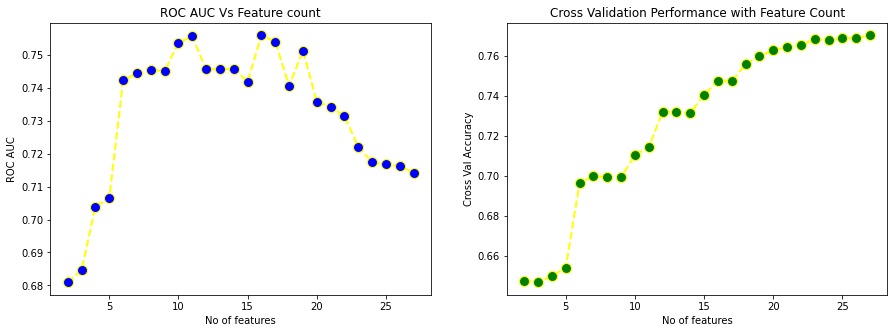

best feature count : 16 
Best AUC: 0.76
CV at best feature count: 0.75
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      5669
           1       0.17      0.55      0.26       479

    accuracy                           0.75      6148
   macro avg       0.56      0.66      0.55      6148
weighted avg       0.89      0.75      0.80      6148



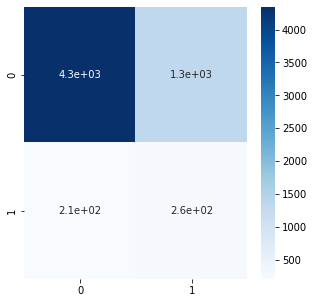

In [116]:
best_colnames_selected_LR = feature_experiment(LogisticR, X_trainBal, X_test, Y_trainBal, Y_test, skfold)

In [119]:
best_colnames_selected_LR

['age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'icu_type',
 'pre_icu_los_days',
 'apache_2_diagnosis',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_temp_max',
 'd1_temp_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'apache_2_bodysystem']

KNN

---------------------------------------------------
Average Cross Validation score :0.6521013306727592
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.635281078138221
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.6958722887294315
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.736770815342244
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7489420417991847
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7723389223389223
---------------------------------------------------
---------------------------------------------------
Average Cross Valida

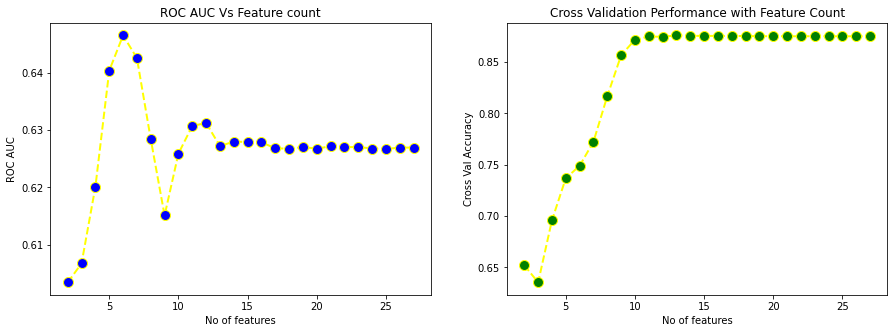

best feature count : 6 
Best AUC: 0.65
CV at best feature count: 0.75
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      5669
           1       0.13      0.40      0.20       479

    accuracy                           0.75      6148
   macro avg       0.54      0.59      0.53      6148
weighted avg       0.88      0.75      0.80      6148



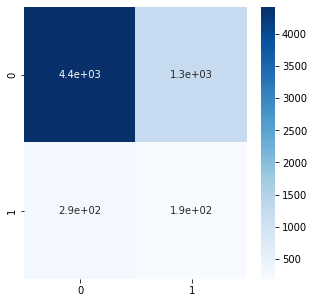

In [123]:
best_colnames_selected_KNN = feature_experiment(KNN, X_trainBal, X_test, Y_trainBal, Y_test, skfold)

In [125]:
best_colnames_selected_KNN

['age',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_resprate_max',
 'd1_temp_max',
 'd1_temp_min']

Desicion Tree

Hyperparameter tunning

In [142]:
# Parameter tuning 

max_depth = range(5,100)
criterion = ['gini', 'entropy']

param_grid = dict(max_depth=max_depth, criterion=criterion)

grid = GridSearchCV(estimator=DT, param_grid=param_grid, n_jobs=-1,  verbose=0)

grid_result = grid.fit(X_trainBal, Y_trainBal)
print("\n The best estimators across all searched params:\n",grid.best_estimator_)


 The best estimators across all searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=92)


In [146]:
# Decison Tree model with best hyperparameters
DT_best = DecisionTreeClassifier(max_depth=92, criterion='entropy')

---------------------------------------------------
Average Cross Validation score :0.9271243056957343
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.8943150228864514
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.8914048699762986
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.8921984636270353
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.8866040366040366
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.8912155269298128
---------------------------------------------------
---------------------------------------------------
Average Cross Vali

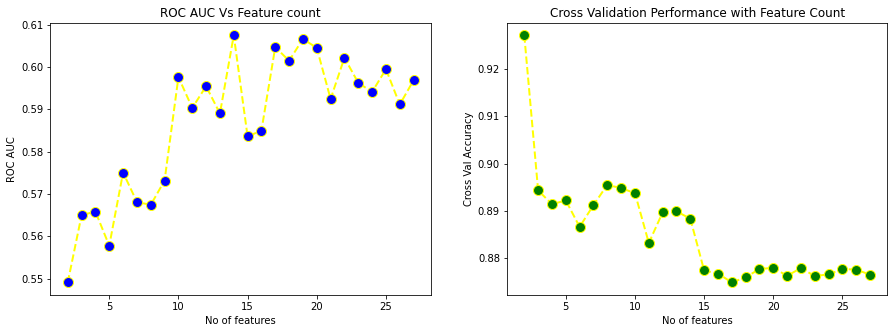

best feature count : 14 
Best AUC: 0.61
CV at best feature count: 0.89
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5669
           1       0.19      0.33      0.25       479

    accuracy                           0.84      6148
   macro avg       0.57      0.61      0.58      6148
weighted avg       0.88      0.84      0.86      6148



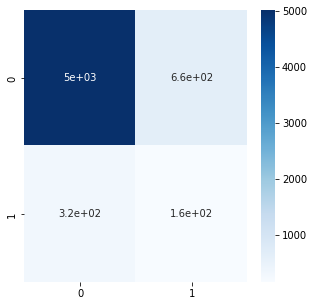

In [147]:
best_colnames_selected_DT = feature_experiment(DT_best, X_trainBal, X_test, Y_trainBal, Y_test, skfold)

---------------------------------------------------
Average Cross Validation score :0.691487377201663
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7041880184737328
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7041881899024756
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7411171482600054
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7408147336718767
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.7425913854485284
---------------------------------------------------
---------------------------------------------------
Average Cross Valid

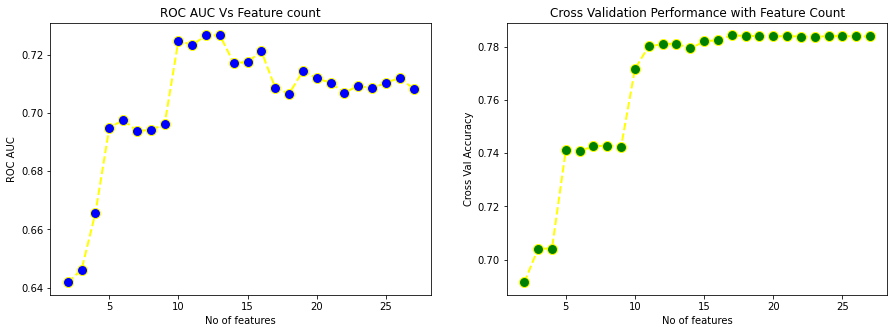

best feature count : 13 
Best AUC: 0.73
CV at best feature count: 0.78
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      5669
           1       0.16      0.57      0.25       479

    accuracy                           0.73      6148
   macro avg       0.56      0.66      0.54      6148
weighted avg       0.89      0.73      0.79      6148



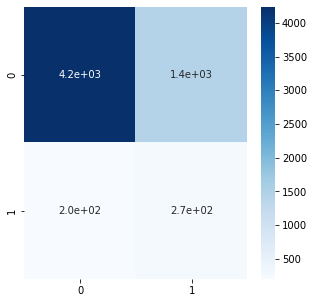

In [131]:
best_colnames_selected_DT = feature_experiment(DT, X_trainBal, X_test, Y_trainBal, Y_test, skfold)

In [133]:
best_colnames_selected_DT

['age',
 'bmi',
 'pre_icu_los_days',
 'apache_2_diagnosis',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_temp_max',
 'd1_temp_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'apache_2_bodysystem']

Random Forest

---------------------------------------------------
Average Cross Validation score :0.923003944432516
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.914121464121464
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.9284093212664641
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.9292031363459934
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.9301479015764731
---------------------------------------------------
---------------------------------------------------
Average Cross Validation score :0.9357044357044357
---------------------------------------------------
---------------------------------------------------
Average Cross Valida

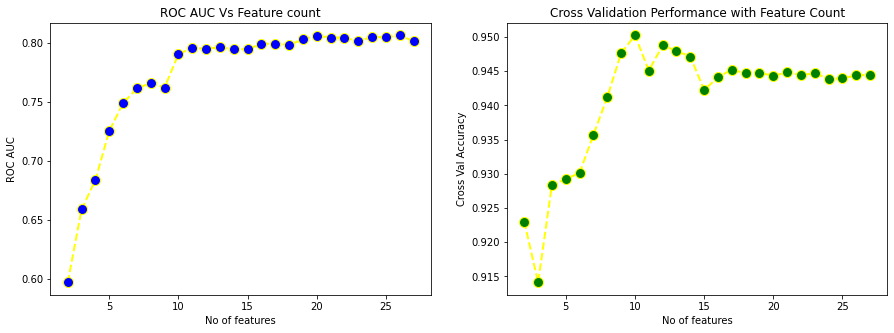

best feature count : 26 
Best AUC: 0.81
CV at best feature count: 0.94
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5669
           1       0.31      0.25      0.27       479

    accuracy                           0.90      6148
   macro avg       0.62      0.60      0.61      6148
weighted avg       0.89      0.90      0.89      6148



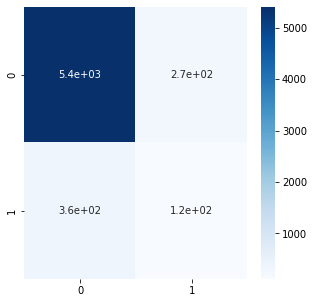

In [135]:
best_colnames_selected_RF = feature_experiment(RF, X_trainBal, X_test, Y_trainBal, Y_test, skfold)

In [136]:
best_colnames_selected_RF

['age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'apache_2_diagnosis',
 'arf_apache',
 'intubated_apache',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_temp_max',
 'd1_temp_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'apache_2_bodysystem']